In [1]:
import disaggregate

In [2]:
from __future__ import print_function, division
import itertools
from copy import deepcopy
from collections import OrderedDict
from warnings import warn
from datetime import datetime
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from six import iteritems
from builtins import range
from disaggregate import fhmm_exact

In [3]:
%matplotlib inline

In [4]:
def convert_to_datetime(x):
    return datetime.fromtimestamp(x)

def resample_data(df,resample_freq):
    avg_df = df.resample(resample_freq).mean()
    return avg_df

list1=[]
for i in range(0,52235):
    list1.append(i)
    
    
data_ref=pd.read_csv('redd/house_1/channel_5.dat', sep='\s+', header=None, skiprows=1)
data_ref.columns=['unix_date','power']
data_ref['date'] = data_ref['unix_date'].apply(convert_to_datetime)
data_ref = data_ref.set_index('date').drop('unix_date', axis = 1)
resampled_ref = resample_data(data_ref,'1Min')
resampled_ref['index']=list1
resampled_ref = resampled_ref.set_index('index')
resampled_ref.fillna(0,inplace=True)

data_micro=pd.read_csv('redd/house_1/channel_11.dat', sep='\s+', header=None, skiprows=1)
data_micro.columns=['unix_date','power']
data_micro['date'] = data_micro['unix_date'].apply(convert_to_datetime)
data_micro = data_micro.set_index('date').drop('unix_date', axis = 1)
resampled_micro = resample_data(data_micro,'1Min')
resampled_micro['index']=list1
resampled_micro = resampled_micro.set_index('index')
resampled_micro.fillna(0,inplace=True)

data_light=pd.read_csv('redd/house_1/channel_9.dat', sep='\s+', header=None, skiprows=1)
data_light.columns=['unix_date','power']
data_light['date'] = data_light['unix_date'].apply(convert_to_datetime)
data_light = data_light.set_index('date').drop('unix_date', axis = 1)
resampled_light = resample_data(data_light,'1Min')
resampled_light['index']=list1
resampled_light = resampled_light.set_index('index')
resampled_light.fillna(0,inplace=True)

data_dish=pd.read_csv('redd/house_1/channel_7.dat', sep='\s+', header=None, skiprows=1)
data_dish.columns=['unix_date','power']
data_dish['date'] = data_dish['unix_date'].apply(convert_to_datetime)
data_dish = data_dish.set_index('date').drop('unix_date', axis = 1)
resampled_dish = resample_data(data_dish,'1Min')
resampled_dish['index']=list1
resampled_dish = resampled_dish.set_index('index')
resampled_dish.fillna(0,inplace=True)


In [5]:
total_power=OrderedDict()
total_power['ref']=resampled_ref['power'][:2160]
total_power['heat']=resampled_micro['power'][:2160]
total_power['light']=resampled_light['power'][:2160]

total_power

OrderedDict([('ref', index
              0         6.000000
              1         6.000000
              2         6.000000
              3         5.937500
              4         5.937500
              5         6.000000
              6         6.000000
              7         6.000000
              8         6.000000
              9         6.000000
              10        6.000000
              11        6.000000
              12        6.000000
              13        6.000000
              14        6.000000
              15        6.000000
              16        6.000000
              17        5.933333
              18        5.800000
              19        5.933333
              20        5.933333
              21        6.000000
              22        6.000000
              23        6.000000
              24        6.000000
              25        6.000000
              26        6.000000
              27        6.000000
              28        6.000000
              29

In [6]:
fhmm = fhmm_exact.FHMM()

In [8]:
fhmm.train(total_power)

Identifying number of hidden states for appliance ref
Number of hidden states for appliance ref: 3
Training model for appliance ref with 3 hidden states
[1.00000000e+00 0.00000000e+00 1.74875055e-34]
[[0.96161012 0.00188991 0.03649997]
 [0.0054274  0.93357399 0.06099861]
 [0.23299067 0.11807135 0.64893798]]
[[  6.3479065 ]
 [192.13492204]
 [ 71.2899276 ]]
[[[5.84166971e-02]]

 [[2.81063920e+01]]

 [[1.34580369e+04]]]
Identifying number of hidden states for appliance heat
Number of hidden states for appliance heat: 3
Training model for appliance heat with 3 hidden states
[1.00000000e+000 5.42795880e-162 2.27798169e-012]
[[0.98599659 0.00788444 0.00611897]
 [0.17304545 0.59903055 0.227924  ]
 [0.13716806 0.02355199 0.83927995]]
[[   4.16451682]
 [1001.40272634]
 [  30.31179603]]
[[[4.39479431e-02]]

 [[1.77097293e+05]]

 [[8.91997499e+03]]]
Identifying number of hidden states for appliance light
Number of hidden states for appliance light: 3
Training model for appliance light with 3 hidd

In [9]:
power_total=np.zeros((2160,1))
refdata=resampled_ref['power'][2200:4360].reshape(-1,1)
microdata=resampled_micro['power'][2200:4360].reshape(-1,1)
lightdata=resampled_light['power'][2200:4360].reshape(-1,1)
power_total=power_total+refdata
power_total=power_total+microdata
power_total=power_total+lightdata


/home/aman/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/aman/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aman/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [10]:
df=pd.DataFrame(power_total)


In [11]:
result=fhmm.disaggregate_chunk(df)

In [12]:
result

,heat,light,ref
0,30.0,219.0,6.0
1,4.0,82.0,192.0
2,4.0,82.0,192.0
3,4.0,82.0,192.0
4,4.0,82.0,192.0
5,4.0,82.0,192.0
6,30.0,82.0,71.0
7,4.0,82.0,6.0
8,4.0,82.0,6.0
9,4.0,82.0,6.0


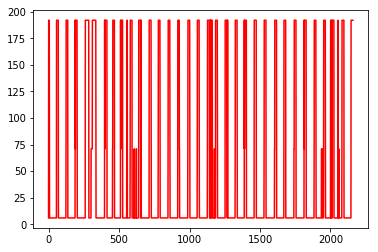

In [13]:
plt.plot(result['ref'], 'r', label="Predicted")

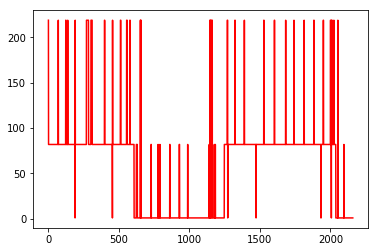

In [14]:
plt.plot(result['light'], 'r', label="Predicted")